# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

### Generate Data

In [2]:
def generate_dataset(seed):
    np.random.seed(seed)
    x = np.array([])
    y = np.array([])
    loop = np.random.randint(10,15)

    for i in range(loop):
        x = np.append(x,np.random.normal(np.random.randint(10),np.random.rand(),20))
        y = np.append(y,np.random.normal(np.random.randint(10),np.random.rand(),20))
        
    df = pd.DataFrame(data = {"x":x,"y":y})
    df.to_csv("dataset.csv",index=False)
    
generate_dataset(2440027524)

### Load the Csv File

In [3]:
df = pd.read_csv("dataset.csv")
df.head()

,x,y
0,0.464423,5.076605
1,-0.431418,4.619784
2,0.754913,5.179087
3,-0.047893,4.530395
4,0.191330,5.286972


### Descriptive statistics of the Data

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,260.0,4.922184,3.420416,-1.654828,1.355393,5.801885,7.930882,10.380795
y,260.0,4.110200,2.562970,-0.683484,2.094917,4.668260,6.293155,8.150610


### Data Visualization

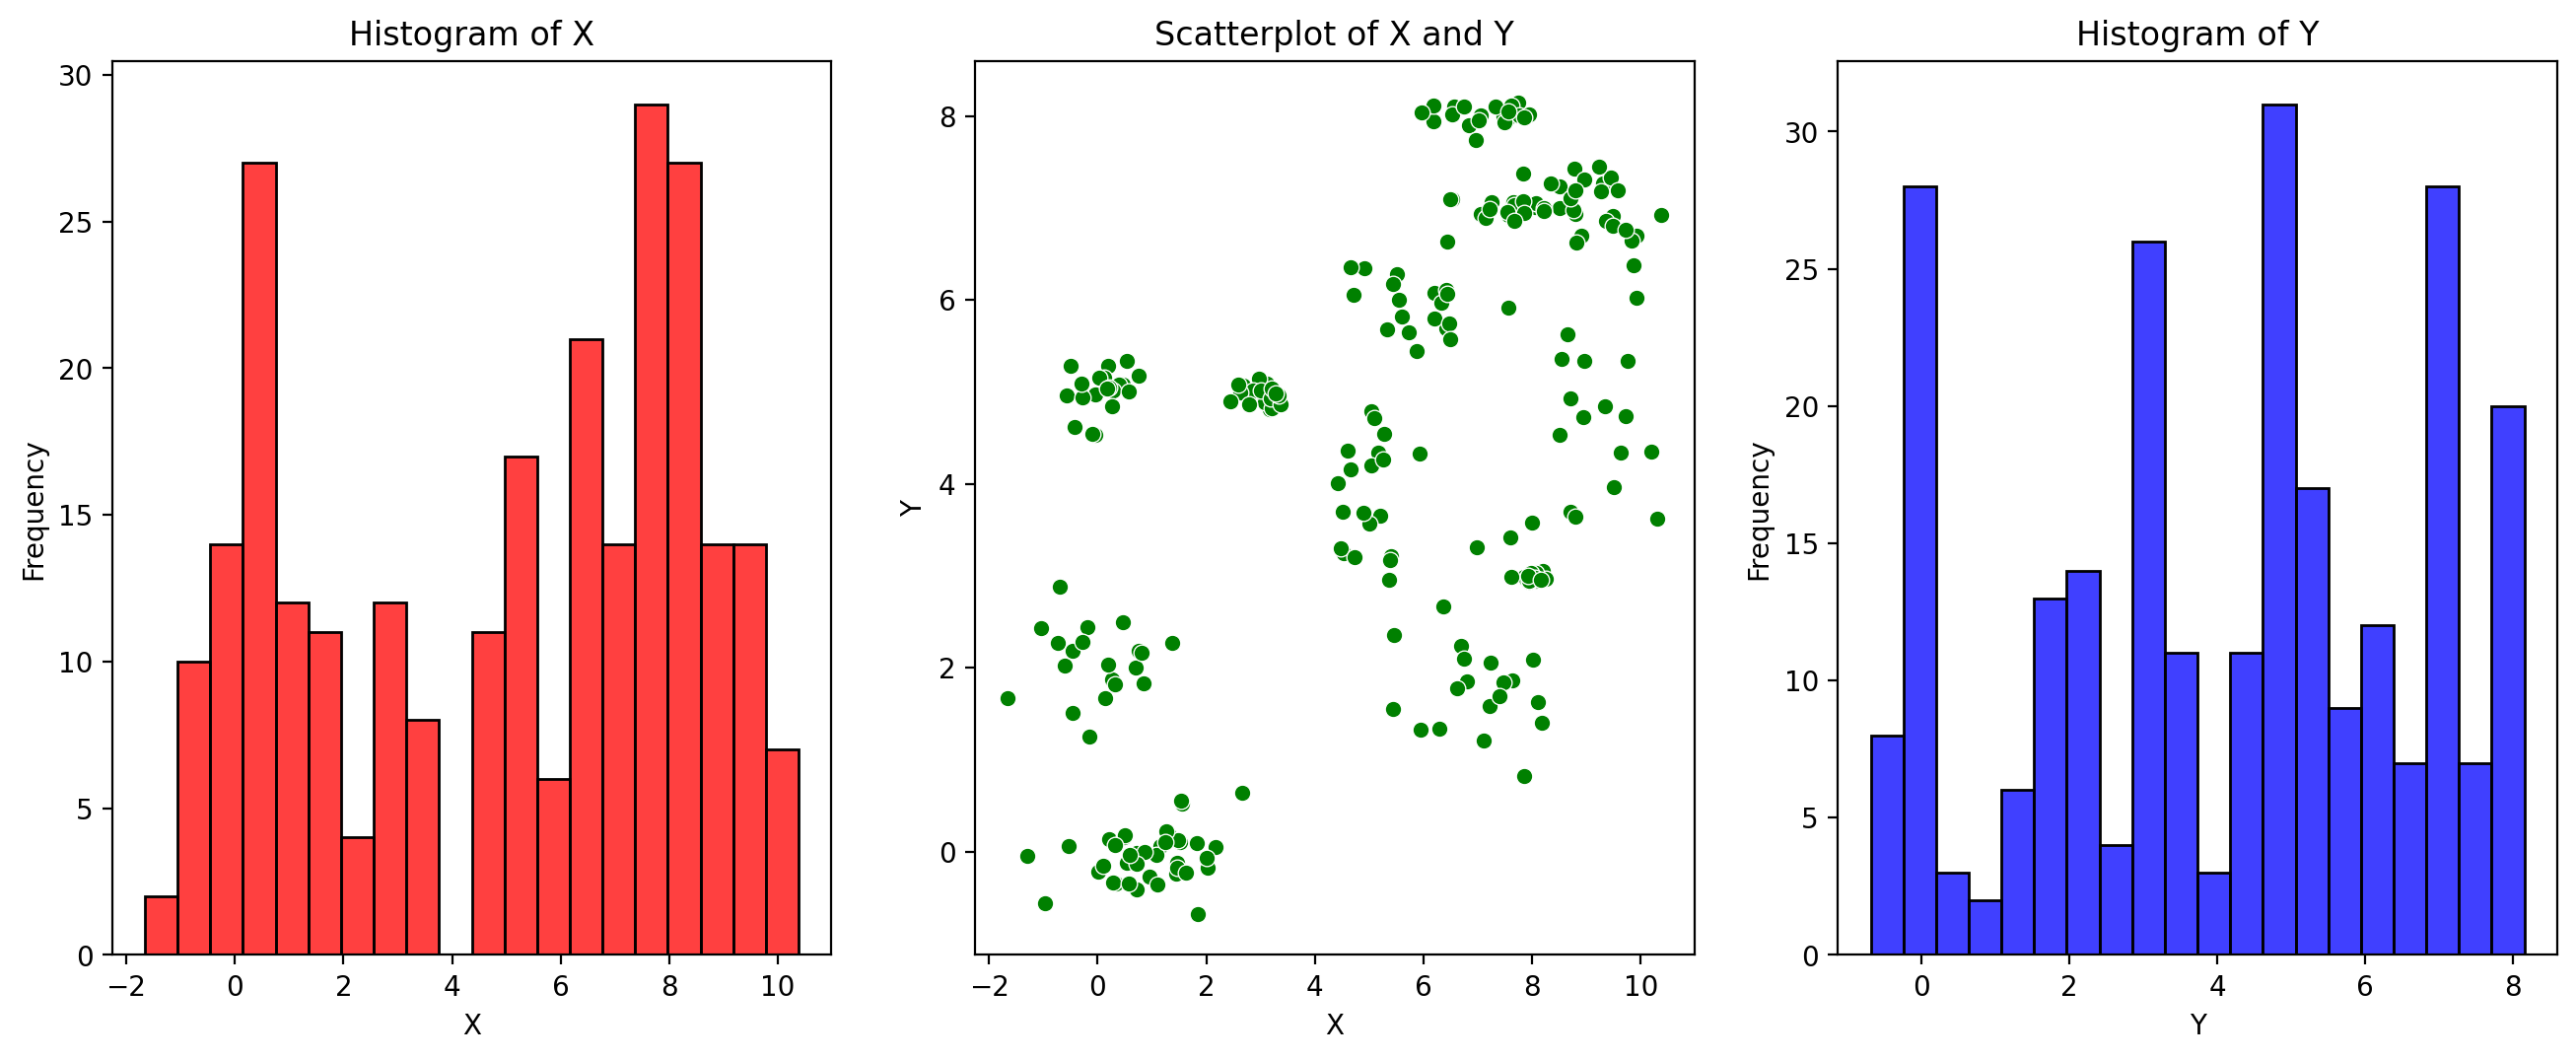

In [5]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,6),dpi=200)

sns.histplot(data=df,x="x",bins=20,ax=ax[0],color="r")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Histogram of X")

sns.scatterplot(data=df,x="x",y="y",ax=ax[1],color="g")
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")
ax[1].set_title("Scatterplot of X and Y")

sns.histplot(data=df,x="y",bins=20,ax=ax[2],color="b")
ax[2].set_xlabel("Y")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Histogram of Y")

plt.show()

# K-Means Clustering Analysis

### Data Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

### Elbow Method to Find the Optimal Value of K

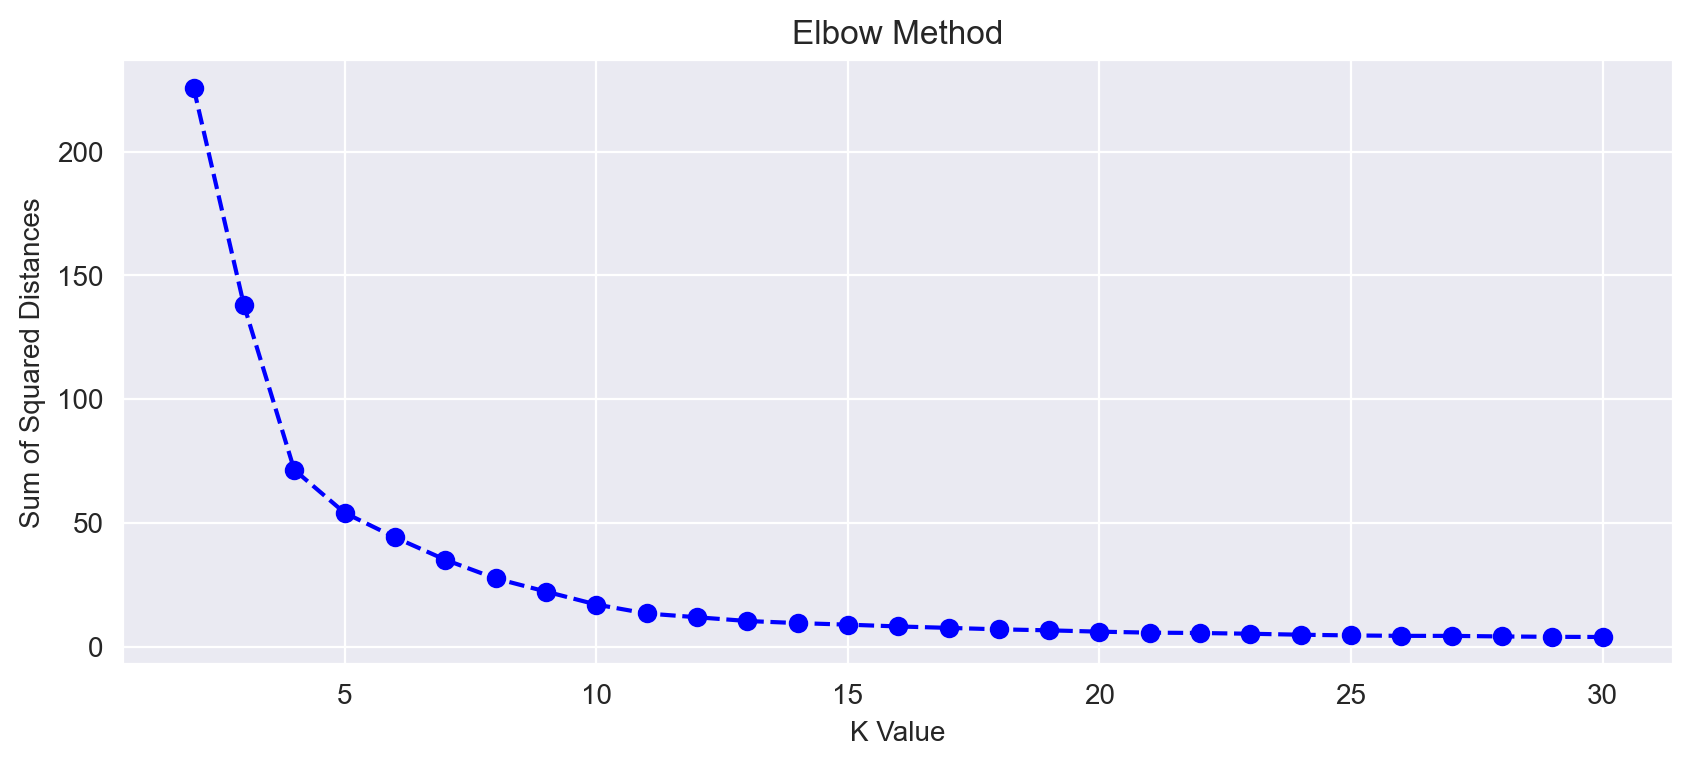

In [7]:
from sklearn.cluster import KMeans

ssd = []
for k in range(2,31):
    model = KMeans(n_clusters=k,random_state=101)
    model.fit(scaled_df)
    ssd.append(model.inertia_)

with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    plt.plot(range(2,31),ssd,"bo--")
    plt.title("Elbow Method")
    plt.xlabel("K Value")
    plt.ylabel("Sum of Squared Distances")
    plt.show()

In [8]:
pd.DataFrame({"K Value":range(2,31),
              "Sum of Squared Distances":ssd,
              "Differences":abs(pd.Series(ssd).diff()).tolist()}).set_index("K Value")

,Sum of Squared Distances,Differences
K Value,,
2,225.754272,NaN
3,137.969893,87.784379
4,71.484004,66.485889
5,54.153137,17.330867
6,44.239121,9.914016
7,35.187017,9.052103
8,27.634985,7.552033
9,22.343632,5.291353
10,17.110599,5.233032


### Final Model Using K = 5

In [9]:
model = KMeans(n_clusters=5,random_state=101)
cluster_labels = model.fit_predict(scaled_df)

In [10]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ["x","y"]
scaled_df["cluster"] = cluster_labels
scaled_df.head()

,x,y,cluster
0,-1.305794,0.377792,4
1,-1.568209,0.199209,4
2,-1.220702,0.417855,4
3,-1.455865,0.164265,4
4,-1.385790,0.460030,4


### Clustering Visualization

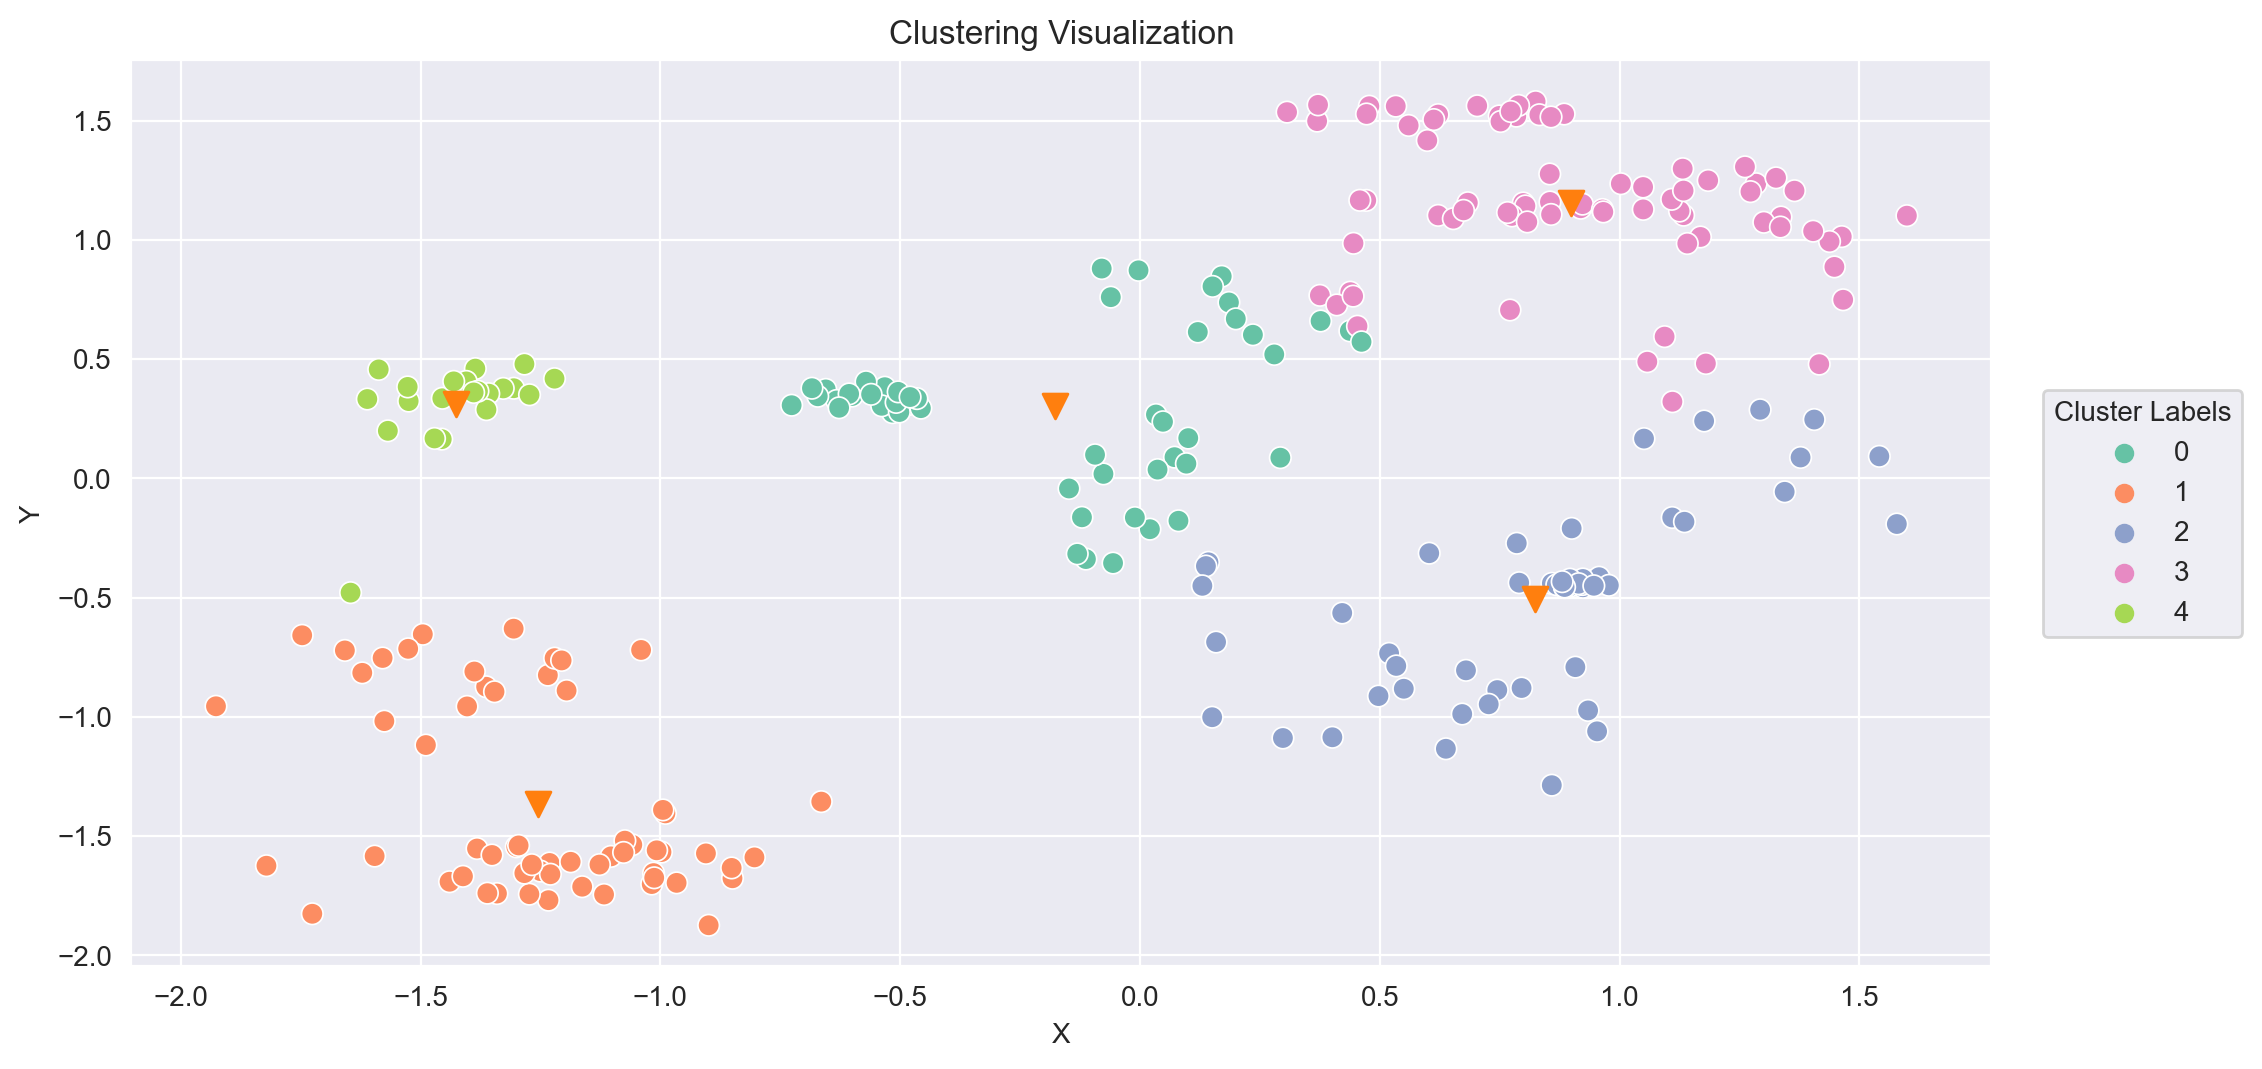

In [11]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12,6),dpi=200)
    sns.scatterplot(data=scaled_df,x="x",y="y",hue="cluster",palette="Set2",s=60)
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="v",s=80)
    plt.title("Clustering Visualization")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left",title="Cluster Labels")
    plt.show()